In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import silhouette_score


In [2]:
# Load the excel file(s) 
df = pd.read_excel('miles50_coventry.xlsx')

In [3]:
df.head()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524


In [4]:
len(df)

4119

In [5]:
df.groupby(df.columns.tolist(),as_index=False).size()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,size
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000,1
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025,1
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323,1
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439,1
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4121,NG8,Midlands,42.25,2286675,847974,2023-04-06 14:29:14.100,Dispatched,Payment Gateway,DX Freight,120.50,0.00,2023-04-06,11.36,United Kingdom,21.00,1.250000,1.250000,1
4115,4122,MK43,Midlands,46.14,2299291,848793,2023-04-21 17:10:04.240,Dispatched,Payment Gateway,DX Express,57.78,7.17,2023-04-24,6.76,United Kingdom,7.20,0.019250,0.061473,1
4116,4123,GL1,Midlands,47.05,2286559,851414,2023-04-06 13:29:21.527,Dispatched,Payment Gateway,DX Express,42.42,7.20,2023-04-06,6.79,United Kingdom,13.14,0.140650,0.082143,1
4117,4124,NN11,Midlands,19.77,2288157,858296,2023-04-11 11:41:11.387,Dispatched,Paypal,DX Freight,31.44,12.23,2023-04-11,10.92,United Kingdom,13.20,0.144000,0.100000,1


In [6]:
# Create new DF with relevant details 
df1 = df.copy()

In [7]:
# Check dates are correctly formatted 
df1.dtypes

Unnamed: 0                     int64
outward_code_x                object
dist_centres                  object
distance                     float64
OrderID                        int64
WebsiteID                      int64
OrderDate             datetime64[ns]
Status                        object
PaymentOption                 object
Courier                       object
ProductsExVAT                float64
DeliveryExVAT                float64
DateDespatched        datetime64[ns]
DeliveryCost                 float64
country                       object
Weight_per_line              float64
Volume_per_line_m3           float64
Pallet_per_line              float64
dtype: object

In [10]:
# Update Dateformat 
df1['OrderDate'] = pd.to_datetime(df1['OrderDate']) 
df1['OrderDate'] = df1['OrderDate'].dt.strftime('%d/%m/%Y')


In [11]:
# Reading the Excel file of coordinate information into a Pandas DataFrame
long_lat = pd.read_csv('UK-Postcodes.csv')

# Viewing the DataFrame
long_lat.head()

,id,outcode,latitude,longitude
0,1,AB10,57.131086,-2.122482
1,2,AB11,57.131210,-2.082261
2,3,AB12,57.098381,-2.172400
3,4,AB13,57.108000,-2.237000
4,5,AB14,57.101000,-2.270000


In [12]:
# Merging the long-lat and customers_cleaned DataFrames into a new one
# Carrying out a left join to get a latitude and longitiude for each of our postcodes
data = pd.merge(df1, long_lat, 
                    left_on = 'outward_code_x',
                    right_on = 'outcode',
                    how = 'left')

In [13]:
data['outward_code_x'].nunique()
data['OrderID'].nunique()

4119

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

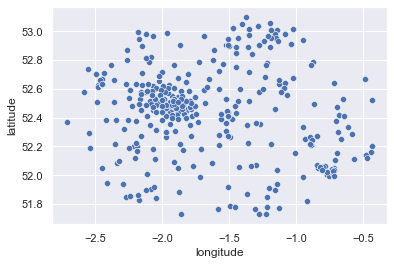

In [14]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='longitude',
                y='latitude',
                data=data)


In [15]:
# Create a pairplot with Seaborn.
x = data[['longitude', 'latitude','id','OrderID']]
x

,longitude,latitude,id,OrderID
0,-2.173682,52.496759,766,2295440
1,-1.582311,51.767526,1934,2292996
2,-1.562449,52.424186,597,2285048
3,-1.911238,52.765303,2915,2297608
4,-0.726102,52.006042,1664,2281052
...,...,...,...,...
4114,-1.213406,52.964498,1820,2286675
4115,-0.566550,52.115500,1681,2299291
4116,-2.242429,51.853212,1009,2286559
4117,-1.187850,52.217508,1826,2288157


In [16]:
a = x[['longitude','latitude']]

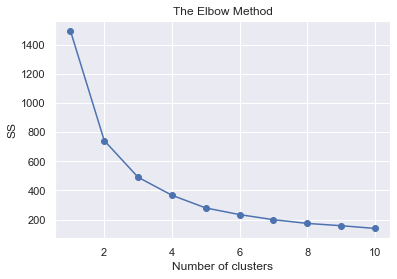

In [17]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(a)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")
plt.show()

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\anaconda3\lib\site-packages\sklearn\clust

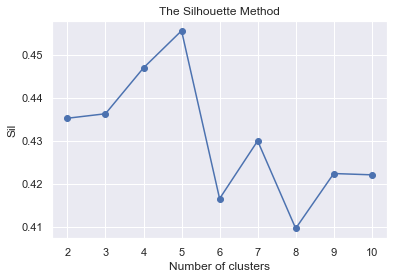

In [18]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10


for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(a)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(a,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## Elbow method indicates 4 clusters
## Silhouette Method indicates 5 clusters

**4 CLUSTERS**

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\AppData\Local\Temp/ipykernel_22512/3747191018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['K-Means Predicted'] = clusters4


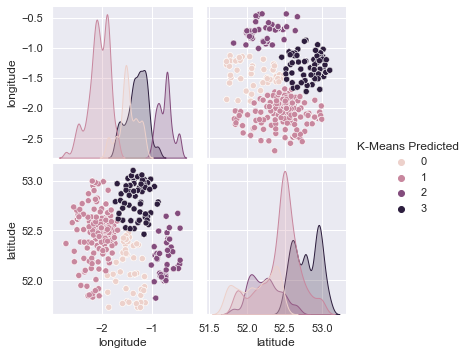

In [19]:
# Use 4 clusters:
kmeans1 = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(a)

clusters4 = kmeans1.labels_
a['K-Means Predicted'] = clusters4

# Plot the predicted.
sns.pairplot(a,
             hue='K-Means Predicted',
             diag_kind= 'kde')

Text(0.5, 1.0, 'Clusters based on Langitude & Latitude - 4 clusters')

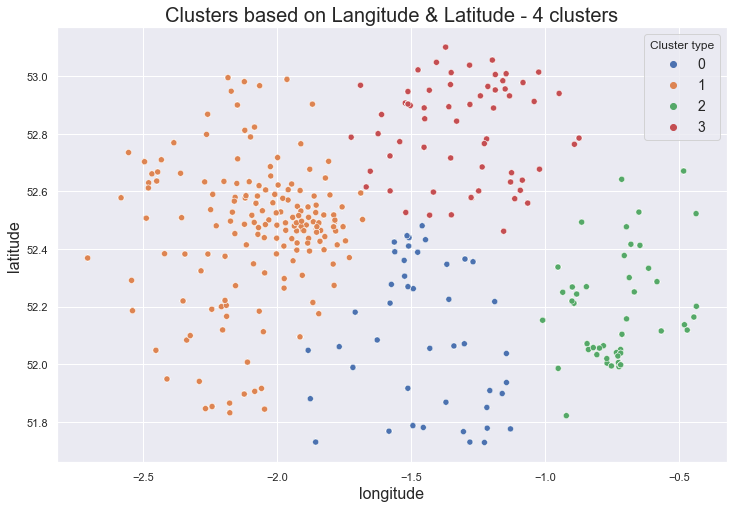

In [20]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='longitude', 
                y ='latitude',
                data=a ,
                hue='K-Means Predicted',palette="deep")
plt.legend(title='Cluster type', fontsize=14)
plt.xlabel('longitude', fontsize=16);
plt.ylabel('latitude', fontsize=16);
plt.title('Clusters based on Langitude & Latitude - 4 clusters', fontsize=20)

In [21]:
# Labels of each point
x['cluster4_label'] = kmeans1.fit_predict(a[a.columns[1:5]])

x.head()

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\AppData\Local\Temp/ipykernel_22512/4082038005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster4_label'] = kmeans1.fit_predict(a[a.columns[1:5]])


,longitude,latitude,id,OrderID,cluster4_label
0,-2.173682,52.496759,766,2295440,3
1,-1.582311,51.767526,1934,2292996,2
2,-1.562449,52.424186,597,2285048,2
3,-1.911238,52.765303,2915,2297608,3
4,-0.726102,52.006042,1664,2281052,0


In [22]:
# Sense Check
x['cluster4_label'].count()

4119

In [23]:
# Merge data to to include cluster label
cluster4_data = pd.merge(data,x,on='OrderID' ,how='left')
cluster4_data

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,Volume_per_line_m3,Pallet_per_line,id_x,outcode,latitude_x,longitude_x,longitude_y,latitude_y,id_y,cluster4_label
0,0,DY6,Midlands,26.84,2295440,7700,18/04/2023,Dispatched,On Account,MFS,...,0.225000,0.200000,766,DY6,52.496759,-2.173682,-2.173682,52.496759,766,3
1,1,OX18,Midlands,43.04,2292996,9759,16/04/2023,Dispatched,Payment Gateway,DX Freight,...,0.219678,0.200025,1934,OX18,51.767526,-1.582311,-1.582311,51.767526,1934,2
2,2,CV5,Midlands,2.34,2285048,13038,04/05/2023,Dispatched,Payment Gateway,DX Freight,...,0.044060,0.044323,597,CV5,52.424186,-1.562449,-1.562449,52.424186,597,2
3,3,WS15,Midlands,29.80,2297608,15160,20/04/2023,Dispatched,On Account,DX Express,...,0.053674,0.028439,2915,WS15,52.765303,-1.911238,-1.911238,52.765303,2915,3
4,4,MK1,Midlands,44.21,2281052,16152,31/03/2023,Dispatched,On Account,DX Freight,...,0.090629,0.059524,1664,MK1,52.006042,-0.726102,-0.726102,52.006042,1664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4121,NG8,Midlands,42.25,2286675,847974,04/06/2023,Dispatched,Payment Gateway,DX Freight,...,1.250000,1.250000,1820,NG8,52.964498,-1.213406,-1.213406,52.964498,1820,1
4115,4122,MK43,Midlands,46.14,2299291,848793,21/04/2023,Dispatched,Payment Gateway,DX Express,...,0.019250,0.061473,1681,MK43,52.115500,-0.566550,-0.566550,52.115500,1681,0
4116,4123,GL1,Midlands,47.05,2286559,851414,04/06/2023,Dispatched,Payment Gateway,DX Express,...,0.140650,0.082143,1009,GL1,51.853212,-2.242429,-2.242429,51.853212,1009,3
4117,4124,NN11,Midlands,19.77,2288157,858296,04/11/2023,Dispatched,Paypal,DX Freight,...,0.144000,0.100000,1826,NN11,52.217508,-1.187850,-1.187850,52.217508,1826,2


In [24]:
# Drop irrelevant columns
cluster4_data.drop(columns=['Unnamed: 0','id_x','latitude_x','longitude_x','id_y',
                            'outcode', 'latitude_y','longitude_y'],inplace=True)


In [25]:
# View DataFrame
cluster4_data

,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,cluster4_label
0,DY6,Midlands,26.84,2295440,7700,18/04/2023,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000,3
1,OX18,Midlands,43.04,2292996,9759,16/04/2023,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025,2
2,CV5,Midlands,2.34,2285048,13038,04/05/2023,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323,2
3,WS15,Midlands,29.80,2297608,15160,20/04/2023,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439,3
4,MK1,Midlands,44.21,2281052,16152,31/03/2023,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,NG8,Midlands,42.25,2286675,847974,04/06/2023,Dispatched,Payment Gateway,DX Freight,120.50,0.00,2023-04-06,11.36,United Kingdom,21.00,1.250000,1.250000,1
4115,MK43,Midlands,46.14,2299291,848793,21/04/2023,Dispatched,Payment Gateway,DX Express,57.78,7.17,2023-04-24,6.76,United Kingdom,7.20,0.019250,0.061473,0
4116,GL1,Midlands,47.05,2286559,851414,04/06/2023,Dispatched,Payment Gateway,DX Express,42.42,7.20,2023-04-06,6.79,United Kingdom,13.14,0.140650,0.082143,3
4117,NN11,Midlands,19.77,2288157,858296,04/11/2023,Dispatched,Paypal,DX Freight,31.44,12.23,2023-04-11,10.92,United Kingdom,13.20,0.144000,0.100000,2


**5 CLUSTERS**

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\AppData\Local\Temp/ipykernel_22512/111323446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['K-Means Predicted'] = clusters5


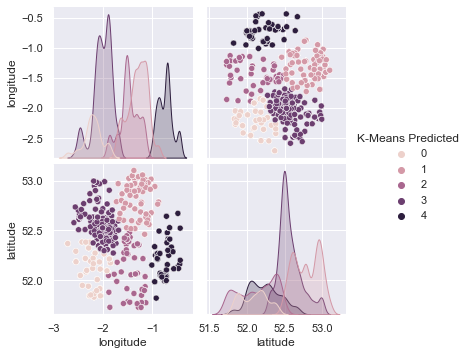

In [26]:
# Use 5 clusters:
kmeans2 = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(a)

clusters5 = kmeans2.labels_
a['K-Means Predicted'] = clusters5

# Plot the predicted.
sns.pairplot(a,
             hue='K-Means Predicted',
             diag_kind= 'kde')

Text(0.5, 1.0, 'Clusters based on Langitude & Latitude - 5 clusters')

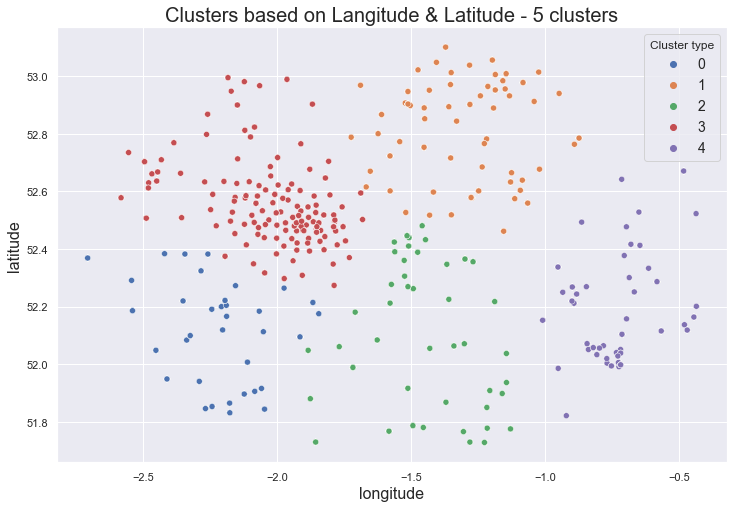

In [27]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='longitude', 
                y ='latitude',
                data=a ,
                hue='K-Means Predicted',palette="deep")
plt.legend(title='Cluster type', fontsize=14)
plt.xlabel('longitude', fontsize=16);
plt.ylabel('latitude', fontsize=16);
plt.title('Clusters based on Langitude & Latitude - 5 clusters', fontsize=20)

In [28]:
# Labels of each point
x['cluster5_label'] = kmeans2.fit_predict(a[a.columns[1:5]])

x.head()

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pawel\AppData\Local\Temp/ipykernel_22512/4050732956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster5_label'] = kmeans2.fit_predict(a[a.columns[1:5]])


,longitude,latitude,id,OrderID,cluster4_label,cluster5_label
0,-2.173682,52.496759,766,2295440,3,1
1,-1.582311,51.767526,1934,2292996,2,3
2,-1.562449,52.424186,597,2285048,2,3
3,-1.911238,52.765303,2915,2297608,3,1
4,-0.726102,52.006042,1664,2281052,0,4


In [29]:
#Remove Longitute and Latitude from X 
x = x[['id','cluster5_label']].copy()
x.head(5)

,id,cluster5_label
0,766,1
1,1934,3
2,597,3
3,2915,1
4,1664,4


In [30]:
# Sense Check
x['cluster5_label'].count()

4119

In [31]:
clustered_data = pd.merge(data, x, on=['id'], how='outer')
clustered_data.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [32]:
clustered_data.head()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude,cluster5_label
0,0,DY6,Midlands,26.84,2295440,7700,18/04/2023,Dispatched,On Account,MFS,...,34.46,United Kingdom,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,85,DY6,Midlands,26.84,2277415,67940,28/03/2023,Dispatched,On Account,DX Freight,...,16.45,United Kingdom,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,86,DY6,Midlands,26.84,2279524,67940,30/03/2023,Dispatched,On Account,DX Freight,...,11.79,United Kingdom,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
3,944,DY6,Midlands,26.84,2275231,483789,27/03/2023,Dispatched,On Account,DX Express,...,6.81,United Kingdom,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1
4,945,DY6,Midlands,26.84,2285334,483789,04/05/2023,Dispatched,On Account,DX Express,...,11.46,United Kingdom,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1


In [33]:
clustered_data.dtypes

Unnamed: 0                     int64
outward_code_x                object
dist_centres                  object
distance                     float64
OrderID                        int64
WebsiteID                      int64
OrderDate                     object
Status                        object
PaymentOption                 object
Courier                       object
ProductsExVAT                float64
DeliveryExVAT                float64
DateDespatched        datetime64[ns]
DeliveryCost                 float64
country                       object
Weight_per_line              float64
Volume_per_line_m3           float64
Pallet_per_line              float64
id                             int64
outcode                       object
latitude                     float64
longitude                    float64
cluster5_label                 int32
dtype: object

In [34]:
clustered_data = clustered_data[['distance', 'OrderID', 'WebsiteID', 'OrderDate',
                                'Courier', 'ProductsExVAT', 'DeliveryExVAT',
                                'DateDespatched', 'DeliveryCost', 'Weight_per_line',
                                'Volume_per_line_m3', 'Pallet_per_line', 'id',
                                'outcode', 'latitude', 'longitude', 'cluster5_label']]

In [35]:
clustered_data = clustered_data.rename(columns={"outcode": "Outward Code", "cluster5_label": "Cluster Label",
                              "Weight_per_line": "Weight", "Volume_per_line_m3": "Volume (m3)",
                              "Pallet_per_line": "Pallets",})

In [36]:
clustered_data['OrderDate']=pd.to_datetime(clustered_data['OrderDate'])
clustered_data['DateDespatched']=pd.to_datetime(clustered_data['DateDespatched'])

In [37]:
clustered_data.head()

,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
0,26.84,2295440,7700,2023-04-18,MFS,375.40,0.00,2023-04-18,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,26.84,2277415,67940,2023-03-28,DX Freight,236.61,0.00,2023-03-28,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,26.84,2279524,67940,2023-03-30,DX Freight,70.58,13.20,2023-03-30,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
3,26.84,2275231,483789,2023-03-27,DX Express,76.95,7.22,2023-03-27,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1
4,26.84,2285334,483789,2023-04-05,DX Express,147.30,0.00,2023-04-05,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1


In [38]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   distance        4119 non-null   float64       
 1   OrderID         4119 non-null   int64         
 2   WebsiteID       4119 non-null   int64         
 3   OrderDate       4119 non-null   datetime64[ns]
 4   Courier         4119 non-null   object        
 5   ProductsExVAT   4119 non-null   float64       
 6   DeliveryExVAT   4119 non-null   float64       
 7   DateDespatched  4119 non-null   datetime64[ns]
 8   DeliveryCost    4119 non-null   float64       
 9   Weight          4119 non-null   float64       
 10  Volume (m3)     4119 non-null   float64       
 11  Pallets         4119 non-null   float64       
 12  id              4119 non-null   int64         
 13  Outward Code    4119 non-null   object        
 14  latitude        4119 non-null   float64       
 15  long

In [39]:
clustered_data.to_csv('clustered_data.csv')